In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [158]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 원본데이터 분할하기

In [26]:
# 원본 데이터 가져오기
# 컬럼을 추출하기 위해 일단 0행만 가져오기

df = pd.read_csv("business_data/2019-Oct.csv", nrows=1)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


In [23]:
# 컬름을 cols 변수에 담기

cols = df.columns.to_list()

In [24]:
# 나의 담당인 28,299,176행 ~ 35373969행만 가져오기

ec = pd.read_csv("business_data/2019-Oct.csv", skiprows=28299176, nrows=7074794, names=cols)
ec.shape

(7074794, 9)

In [25]:
ec.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,NaN,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0
5,2019-10-21 09:13:19 UTC,view,28719620,2053013565882762215,NaN,baden,71.82,517347511,1268c141-4dfb-44b5-a342-cf96c366e3b9
6,2019-10-21 09:13:19 UTC,view,21401209,2053013561579406073,electronics.clocks,casio,70.26,541487126,36973919-4e51-442f-99d1-7cacb338aec8
7,2019-10-21 09:13:19 UTC,view,1004241,2053013555631882655,electronics.smartphone,apple,1158.31,515018462,2a1f1e59-d25c-4a0e-b495-4675fef06724
8,2019-10-21 09:13:19 UTC,view,4804541,2053013554658804075,electronics.audio.headphone,ritmix,1.13,546680777,641cb81a-3573-4296-a3bb-2673eb28f257
9,2019-10-21 09:13:19 UTC,view,3601437,2053013563810775923,appliances.kitchen.washer,lg,437.33,539713956,170a8ae5-b463-4e9e-a159-a7b4f6e3b577


# parquet으로 저장하기

In [27]:
# parquet 형식으로 저장
ec.to_parquet("ec.parquet.gzip", compression="gzip")

# parquet 파일 불러오기

In [23]:
# 잘 저장되고 잘 불러와지는지 확인
df = pd.read_parquet("ec.parquet.gzip")
df.shape

(7074794, 9)

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,None,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0


## 데이터 탐색

In [5]:
# 데이터 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 485.8+ MB


In [6]:
# 유일값 확인

df.nunique()

event_time        428197
event_type             3
product_id        121747
category_id          598
category_code        125
brand               3005
price              32627
user_id           860505
user_session     1568864
dtype: int64

In [7]:
# 결측치 비율 확인

df.isnull().mean()

event_time       0.000000e+00
event_type       0.000000e+00
product_id       0.000000e+00
category_id      0.000000e+00
category_code    3.090742e-01
brand            1.434346e-01
price            0.000000e+00
user_id          0.000000e+00
user_session     1.413469e-07
dtype: float64

In [8]:
# event_type 종류 확인

df["event_type"].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [11]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,None,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0


## 불필요한 컬럼 삭제

In [24]:
# user_session 컬럼 삭제

df = df.drop(columns=["user_session"]).copy()
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068


## 데이터타입 변경 및 downcast

In [25]:
# event_time 컬럼 데이터 타입 변경
# object -> datetime

df["event_time"] = pd.to_datetime(df["event_time"])

In [13]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
dtype: object

In [23]:
# 숫자형 데이터의 최솟값이 모두 0이상

df[["product_id", "category_id", "price", "user_id"]].min()

product_id     1.000978e+06
category_id    2.053014e+18
price          0.000000e+00
user_id        3.386938e+07
dtype: float64

In [26]:
# int -> unsigned로 변경

df["product_id"] = pd.to_numeric(df["product_id"], downcast="unsigned")
df["category_id"] = pd.to_numeric(df["category_id"], downcast="unsigned")
df["user_id"] = pd.to_numeric(df["user_id"], downcast="unsigned")
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                    uint32
category_id                   uint64
category_code                 object
brand                         object
price                        float64
user_id                       uint32
dtype: object

In [27]:
# float도 downcast
df["price"] = pd.to_numeric(df["price"], downcast="float")

In [16]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                    uint32
category_id                   uint64
category_code                 object
brand                         object
price                        float32
user_id                       uint32
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     uint32             
 3   category_id    uint64             
 4   category_code  object             
 5   brand          object             
 6   price          float32            
 7   user_id        uint32             
dtypes: datetime64[ns, UTC](1), float32(1), object(3), uint32(2), uint64(1)
memory usage: 350.8+ MB


In [28]:
# object -> category로 변경

df["category_code"] = df["category_code"].astype("category")
df["event_type"] = df["event_type"].astype("category")
df["brand"] = df["brand"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     uint32             
 3   category_id    uint64             
 4   category_code  category           
 5   brand          category           
 6   price          float32            
 7   user_id        uint32             
dtypes: category(3), datetime64[ns, UTC](1), float32(1), uint32(2), uint64(1)
memory usage: 216.0 MB


In [29]:
# 전처리를 한 데이터프레임을 parquet형식으로 저장

df.to_parquet("df.parquet.choseyeon.gzip", compression="gzip")

# 팀 통합 데이터 파일 불러오기

In [35]:
raw = pd.read_parquet("business_data/df_final.parquet.gzip")
raw.shape

(42448763, 8)

## 결측치 삭제

In [37]:
raw = raw.dropna().copy()
raw

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


## 중복값 삭제

In [38]:
raw = raw.drop_duplicates().copy()
raw

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


# 샘플 데이터 불러오기
- 샘플데이터 : 용이한 코드 작성을 위해 1백만행만 슬라이싱한 데이터

In [191]:
sample = pd.read_parquet("business_data/df.sample.parquet.gzip")
sample.shape, sample.dtypes

((1000000, 8),
 event_time       datetime64[ns, UTC]
 event_type                  category
 product_id                     int64
 category_id                   uint64
 category_code                 object
 brand                         object
 price                        float32
 user_id                        int64
 dtype: object)

In [192]:
sample.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
6733995,2019-10-06 08:34:28+00:00,view,16700605,2053013559901684381,furniture.kitchen.chair,zeta,16.190001,518195082


In [193]:
# sample 데이터의 기술통계값
# price의 이상치 발견

sample.describe()

,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,5.389488e+06,2.055721e+18,352.464996,5.341048e+08
std,8.388163e+06,1.568811e+16,380.233673,1.868646e+07
min,1.000978e+06,2.053014e+18,0.000000,2.398766e+08
25%,1.004856e+06,2.053014e+18,109.080002,5.160311e+08
50%,1.500348e+06,2.053014e+18,218.490005,5.308024e+08
75%,5.100337e+06,2.053014e+18,459.070007,5.524060e+08
max,6.050001e+07,2.173217e+18,2574.070068,5.662804e+08


<AxesSubplot: >

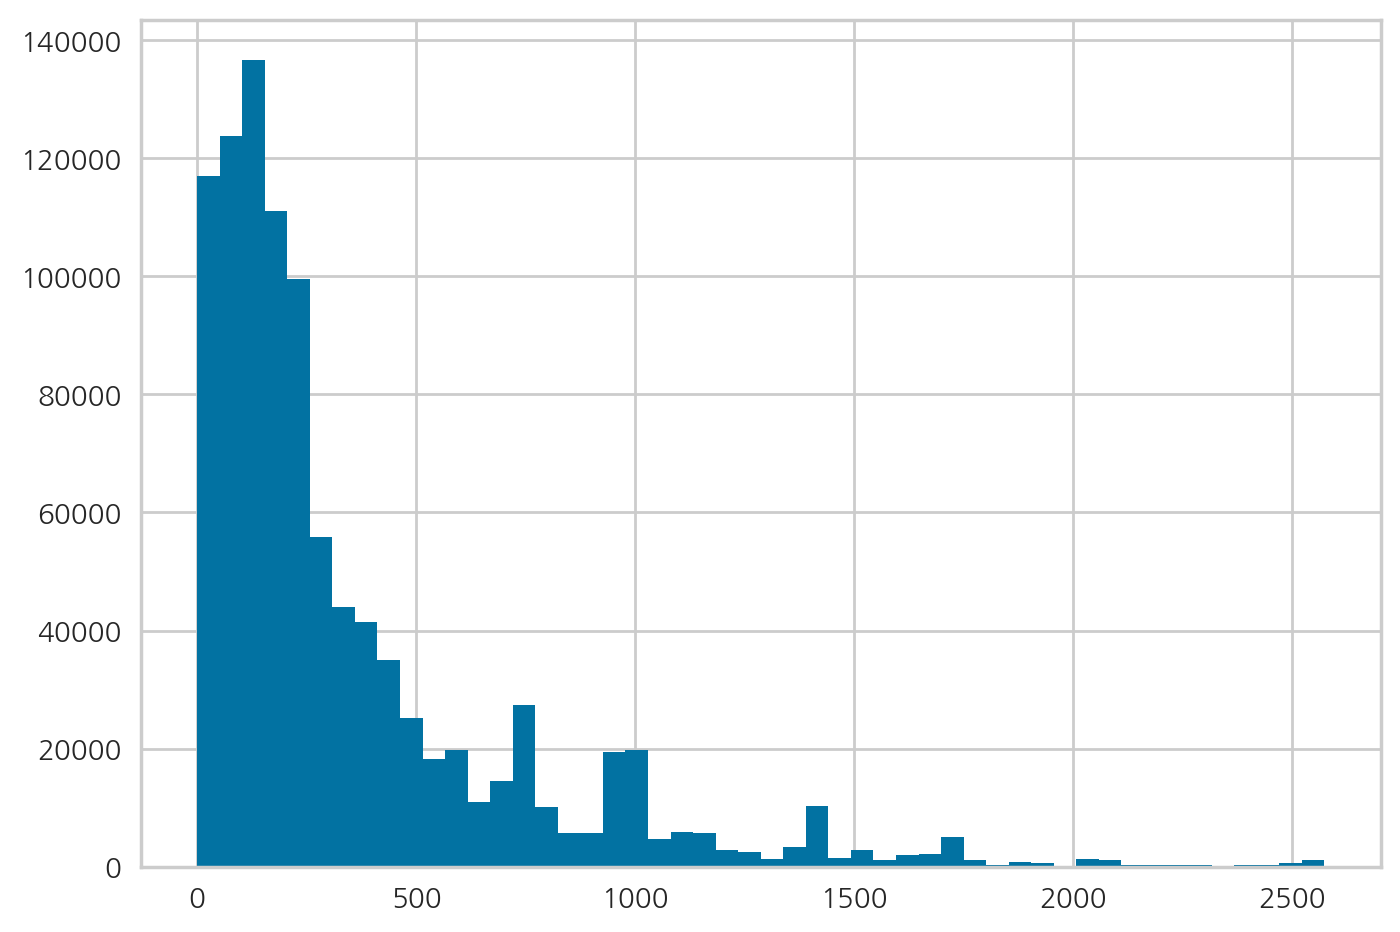

In [194]:
# price의 이상치 확인 1

sample["price"].hist(bins=50)

<AxesSubplot: xlabel='price'>

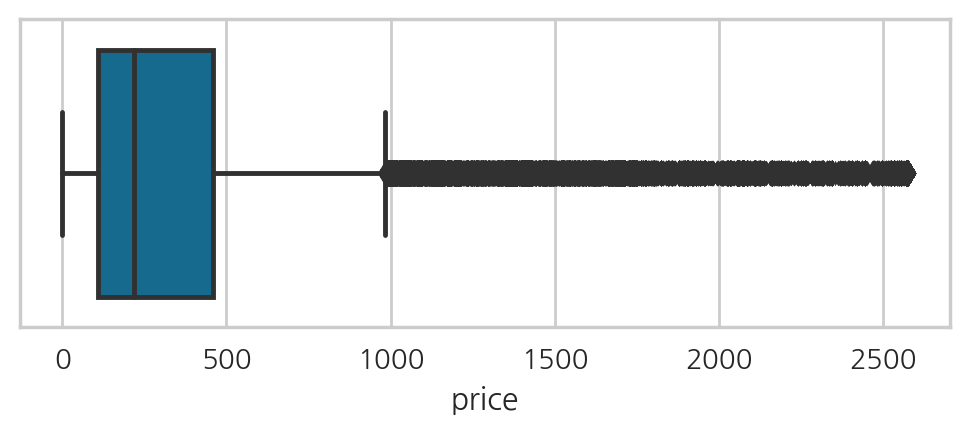

In [195]:
# price의 이상치 확인 2

plt.figure(figsize=(6,2))
sns.boxplot(data=sample, x="price")

In [196]:
# price가 아주 높은 category_code는 주로 전자제품, 컴퓨터
# 어떻게 처리할지는 나중에 의논.

sample[sample["price"] > 2500]["category_code"].value_counts()

computers.notebook                   331
electronics.video.tv                 330
computers.desktop                    228
electronics.clocks                   210
sport.bicycle                         95
appliances.kitchen.coffee_machine     47
electronics.tablet                    38
appliances.kitchen.refrigerators      30
appliances.kitchen.oven               17
construction.tools.drill              16
electronics.camera.photo               7
appliances.sewing_machine              7
construction.tools.generator           6
appliances.kitchen.hood                3
furniture.universal.light              2
construction.tools.pump                2
construction.tools.saw                 2
construction.components.faucet         1
appliances.kitchen.steam_cooker        1
Name: category_code, dtype: int64

In [211]:
pd.to_datetime(sample["event_time"]).dt.day.value_counts().sort_index()

1     34850
2     34539
3     32994
4     41801
5     38166
6     37978
7     33227
8     35140
9     35539
10    35797
11    35724
16    21618
17    41033
18    42516
19    42194
20    43311
21    39969
22    40736
23    39432
24    37456
25    40521
26    39095
27    39959
28    34573
29    33746
30    33404
31    34682
Name: event_time, dtype: int64

## 구매한 내역만 불러오기
- RFM 분석은 구매까지 진행한 고객을 대상으로 하는 분석이므로 구매고객만 추출

In [197]:
df_p = sample[sample["event_type"] == "purchase"].copy()
df_p

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074
...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786


In [210]:
pd.to_datetime(df_p["event_time"]).dt.day.value_counts().sort_index()

1     614
2     691
3     644
4     881
5     827
6     749
7     701
8     691
9     721
10    715
11    768
16    471
17    929
18    866
19    824
20    832
21    892
22    833
23    834
24    798
25    790
26    806
27    859
28    715
29    716
30    707
31    702
Name: event_time, dtype: int64

# RFM 계산

## 전체 주문에서 최근 주문일 구하기

In [198]:
last_timestamp = df_p["event_time"].max() + dt.timedelta(days=1)
df_p["event_time"].max(), last_timestamp

(Timestamp('2019-10-31 23:49:19+0000', tz='UTC'),
 Timestamp('2019-11-01 23:49:19+0000', tz='UTC'))

## 고객별 R, F, M 값 구하기

In [199]:
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

rfm = df_p.groupby("user_id").agg({"event_time": lambda x : (last_timestamp - x.max()).days,
                                  "product_id":"count",
                                  "price":"sum"})
rfm

,event_time,product_id,price
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999
450756413,29,1,43.730000
456810531,7,1,133.350006
473668240,23,1,149.039993
...,...,...,...
566188229,1,1,221.339996
566210490,1,1,514.780029
566227458,1,1,465.910004


In [200]:
# RFM 컬럼명 변경

rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999
450756413,29,1,43.730000
456810531,7,1,133.350006
473668240,23,1,149.039993
...,...,...,...
566188229,1,1,221.339996
566210490,1,1,514.780029
566227458,1,1,465.910004


In [12]:
# R(최근 거래일 기준 고객별 최근 구매한 날짜와 차이값) 빈도수

rfm["Recency"].value_counts().sort_index()

1     686
2     670
3     680
4     671
5     796
6     743
7     732
8     743
9     773
10    770
11    813
12    767
13    745
14    762
15    818
16    415
21    708
22    645
23    636
24    605
25    615
26    658
27    737
28    784
29    567
30    603
31    542
Name: Recency, dtype: int64

<AxesSubplot: xlabel='Recency', ylabel='count'>

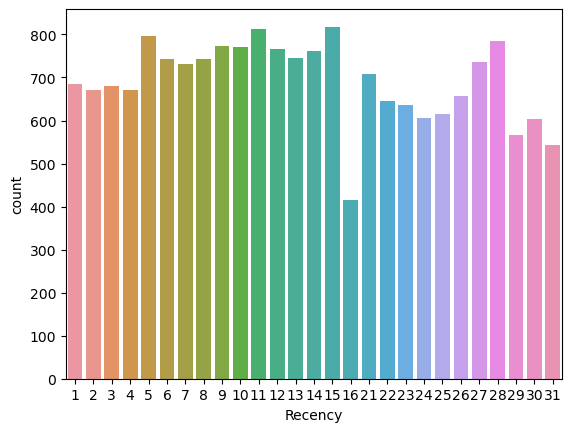

In [13]:
# R(최근 거래일 기준 고객별 최근 구매한 날짜와 차이값) 시각화
# 특이하게도 R값이 비교적 골고루 분포함

sns.countplot(data=rfm, x="Recency")

In [14]:
# 구매 횟수별 빈도수

rfm["Frequency"].value_counts().sort_index()

1     17275
2      1121
3       182
4        66
5        17
6        15
7         2
8         2
10        2
12        2
Name: Frequency, dtype: int64

<AxesSubplot: xlabel='Frequency', ylabel='count'>

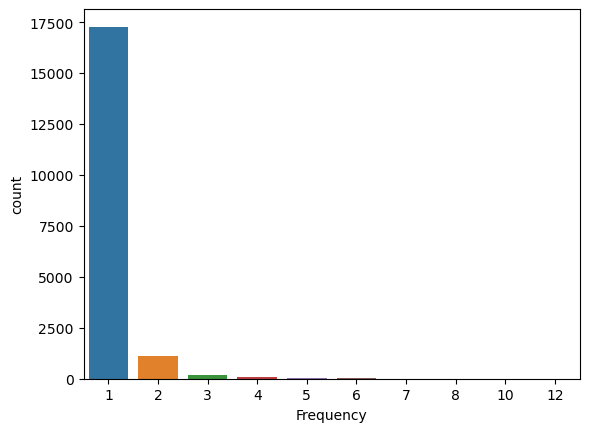

In [15]:
# 구매 횟수별 빈도수 시각화
# 1번 구매한 고객이 압도적으로 많음

sns.countplot(data=rfm, x="Frequency")

# RFM 모형

## qcut을 통해 RFM 변수 만들기

In [16]:
# F, M은 값이 클수록 높은 점수

list(range(1, 6))

[1, 2, 3, 4, 5]

In [17]:
# R은 값이 작을수록 높은 점수

list(range(1, 6))[::-1]

[5, 4, 3, 2, 1]

In [18]:
# Recency 는 최근일수록(값이 작을수록) 높은 점수
# Frequency, MonetaryValue 는 값이 클수록 높은 점수
r_labels = list(range(1, 6))[::-1]
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [19]:
# Frequency에 1이라는 같은 값이 너무 많음 -> 제대로 구간을 나눌 수 없어 오류 발생

# r_cut = pd.qcut(x=rfm["Recency"], q=cut_size, labels=r_labels)
# f_cut = pd.qcut(rfm["Frequency"], cut_size, f_labels)
# m_cut = pd.qcut(rfm["MonetaryValue"], cut_size, m_labels)

In [20]:
# 모든 데이터에 rank()함수를 사용하여 순위를 부여한 후
# 고유한 순위를 기준으로 같은 값이라도 구간별로 할당하는 방식 구현
# 참고 : https://medium.datadriveninvestor.com/valueerror-bin-edges-must-be-unique-71512ff2257d

r_cut = pd.qcut(rfm['Recency'].rank(method="first"), cut_size, r_labels)
f_cut = pd.qcut(rfm['Frequency'].rank(method="first"), cut_size, f_labels)
m_cut = pd.qcut(rfm['MonetaryValue'].rank(method="first"), cut_size, m_labels)

In [21]:
# R, F, M이라는 새로운 컬럼 생성

rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
435648894,26,1,388.130005,2,1,4
437371552,30,1,179.139999,1,1,2
450756413,29,1,43.730000,1,1,1
456810531,7,1,133.350006,4,1,2
473668240,23,1,149.039993,2,1,2
...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3
566210490,1,1,514.780029,5,5,4
566227458,1,1,465.910004,5,5,4


## RFM Segment

In [22]:
# R, F, M 문자를 그대로 붙여 RFM Segment 만들기

rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
user_id,,,,,,,
435648894,26,1,388.130005,2,1,4,214


## RFM Score

In [23]:
# R, F, M 값의 합계로 Score 구하기
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7


<AxesSubplot: xlabel='RFM_segment', ylabel='RFM_score'>

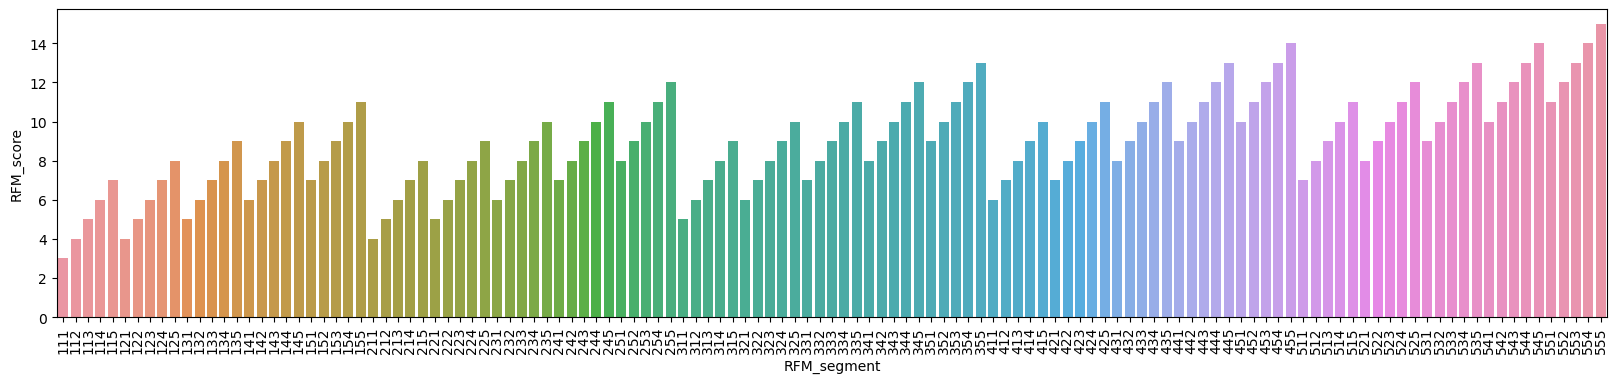

In [24]:
# RFM segment 값에 따라 RFM score 확인
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

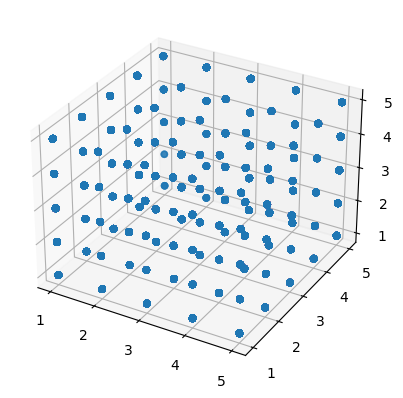

In [25]:
# 구간화가 잘 되었는지 3D로 확인
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

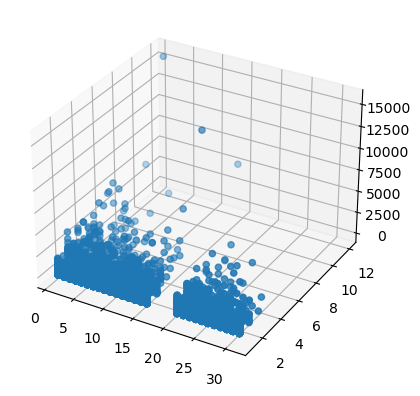

In [26]:
# 구간화 하지 않았을 때와 비교
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [27]:
# RFM score를 기준으로 Recency, Frequency, MonetaryValue 집계값 확인
# RFM score가 10, 11인 경우 MonetaryValue가 가장 높은 것을 확인 -> why? 단지 이 샘플 데이터셋에서만 그런걸수도..

rfm_g = rfm.groupby("RFM_score").agg({"Recency":"mean",
                                      "Frequency":"mean",
                                      "MonetaryValue":["mean", "sum"]
                                     }).style.background_gradient().format("{:,.0f}")
rfm_g

## silver, gold, platinum으로 고객군 나누기

In [28]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 

labels = ["silver", "gold", "platinum"]
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 3, labels)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver


In [29]:
# RFM_score에 따라 RFM_class 값이 잘 나뉘었는지 확인. min-max 확인.
# gold보다 platinum이 더 많음.

rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,8366.0,6.608535,1.308346,3.0,6.0,7.0,8.0,8.0
gold,4870.0,9.486448,0.499868,9.0,9.0,9.0,10.0,10.0
platinum,5448.0,12.237518,1.248803,11.0,11.0,12.0,13.0,15.0


<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

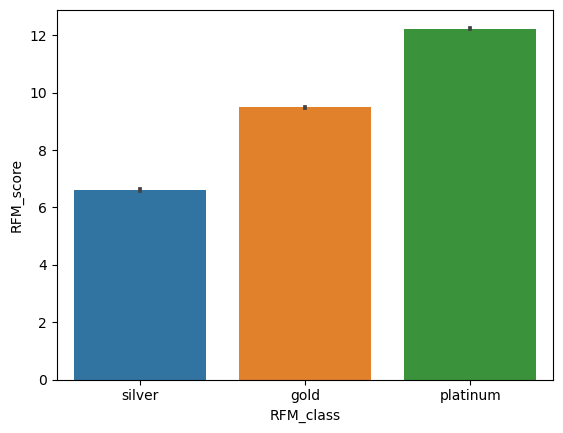

In [30]:
# RFM_class 별 평균 RFM_score 확인(default : 평균)
# barplot

sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

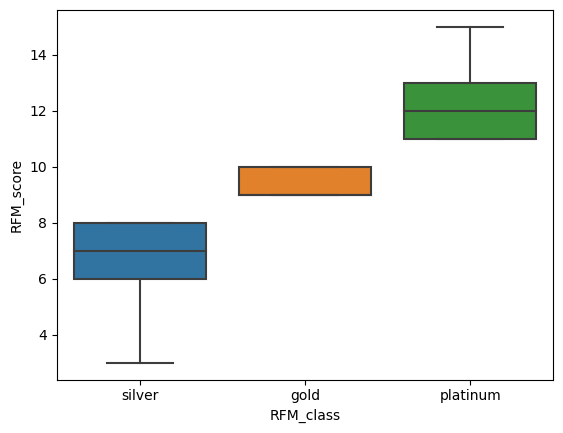

In [31]:
# 같은 내용을 boxplot으로 확인

sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='R', ylabel='RFM_score'>

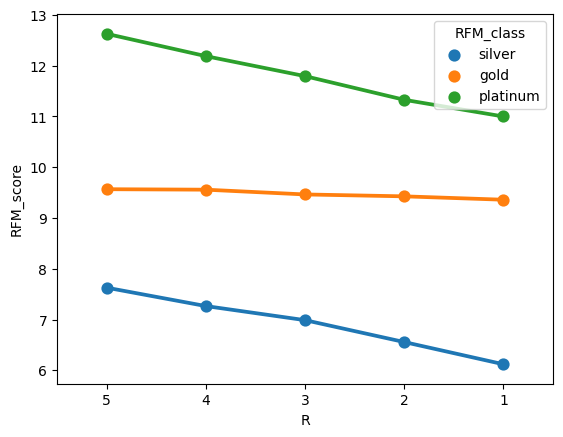

In [32]:
# R을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='F', ylabel='RFM_score'>

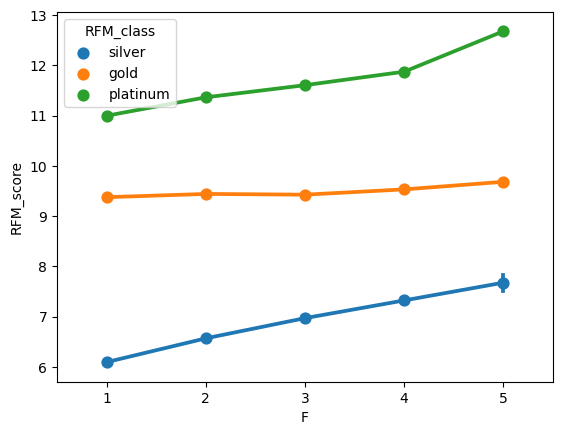

In [33]:
# F을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='M', ylabel='RFM_score'>

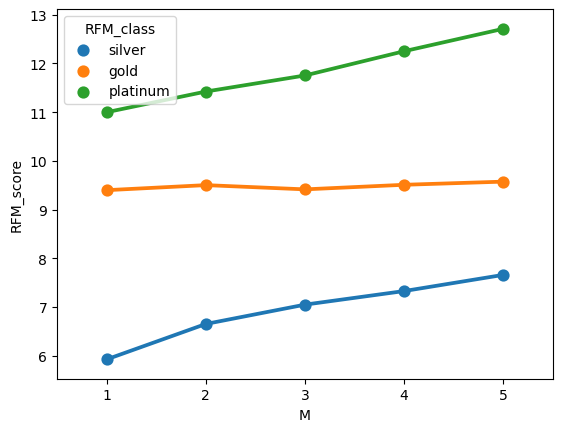

In [34]:
# M을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [35]:
# "RFM_class"를 기준으로 Recency, Frequency, MonetaryValue 확인

rfm_class_g = rfm.groupby("RFM_class").agg({"Recency":"mean",
                                            "Frequency":"mean",
                                            "MonetaryValue":["mean", "sum", "count"]})
rfm_class_g.style.background_gradient().format("{:,.2f}")

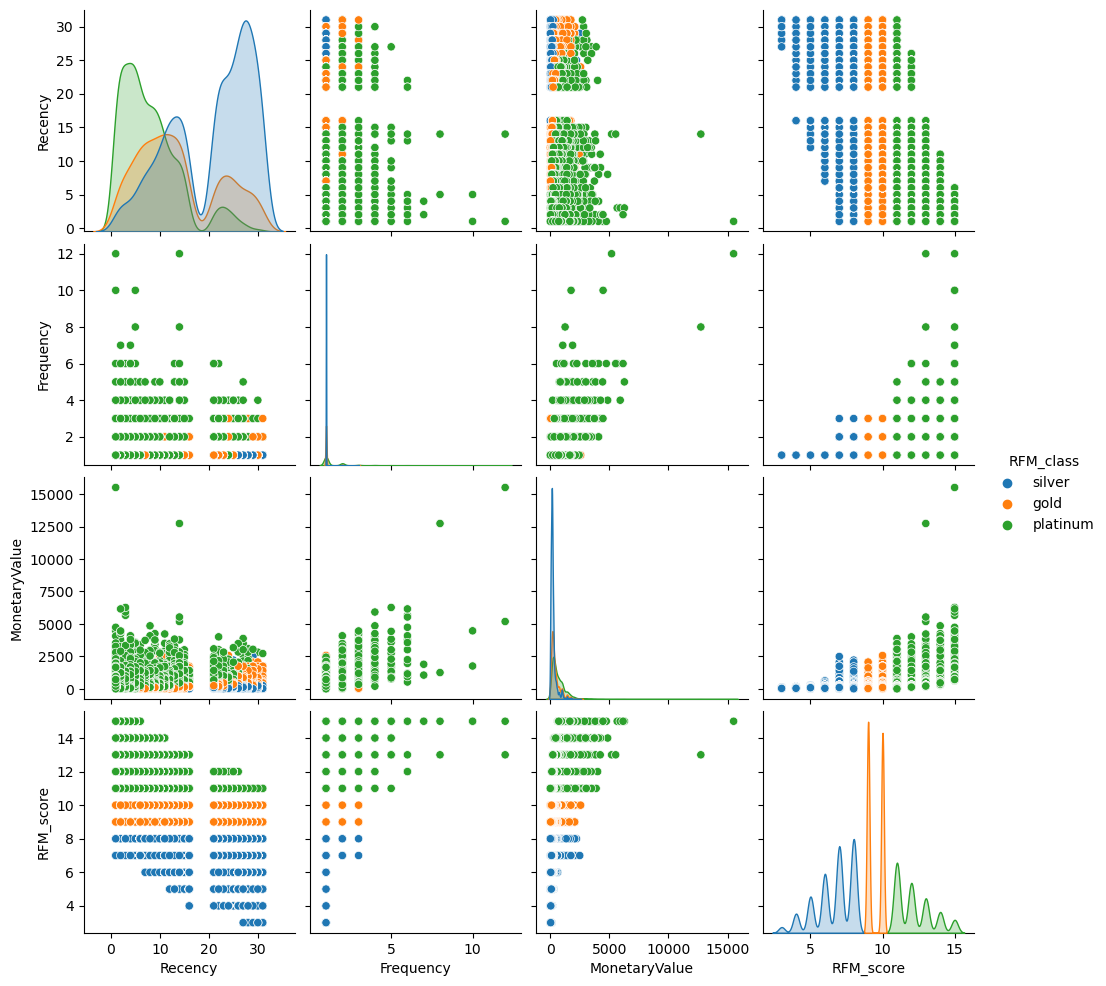

In [36]:
# pairplot으로 "RFM_class" 별로 분포 시각화

sns.pairplot(data=rfm, hue="RFM_class")

In [37]:
# 상관관계 분석

rfm_corr = rfm.corr(numeric_only=True)
rfm_corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.095449,-0.054167,-0.619715
Frequency,-0.095449,1.000000,0.463629,0.351785
MonetaryValue,-0.054167,0.463629,1.000000,0.478380
RFM_score,-0.619715,0.351785,0.478380,1.000000


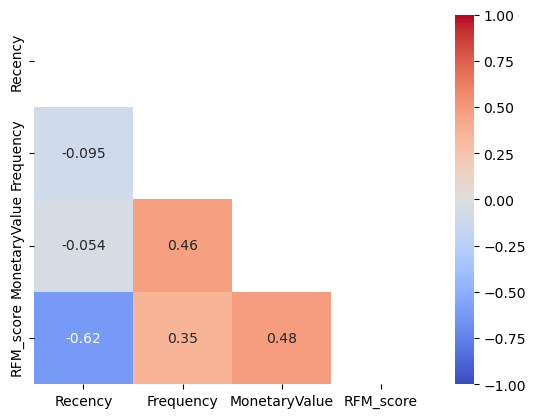

In [38]:
# 히트맵 그리기

mask = np.triu(np.ones_like(rfm_corr))
sns.heatmap(rfm_corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1, mask=mask);

In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18684 entries, 435648894 to 566258164
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        18684 non-null  int64   
 1   Frequency      18684 non-null  int64   
 2   MonetaryValue  18684 non-null  float32 
 3   R              18684 non-null  category
 4   F              18684 non-null  category
 5   M              18684 non-null  category
 6   RFM_segment    18684 non-null  object  
 7   RFM_score      18684 non-null  int64   
 8   RFM_class      18684 non-null  category
dtypes: category(4), float32(1), int64(3), object(1)
memory usage: 876.6+ KB


# RFM 분석자료 저장 & 불러오기

In [40]:
# RFM 분석 자료를 parquet으로 저장
rfm.to_parquet("business_data/mini_rfm.gzip", compression="gzip")

In [41]:
# 저장된 csv 형태의 RFM 분석 자료를 읽어옵니다. 
rfm = pd.read_parquet("business_data/mini_rfm.gzip")
rfm.shape, rfm.head()

((18684, 9),
            Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score  \
 user_id                                                                        
 435648894       26          1     388.130005  2  1  4         214          7   
 437371552       30          1     179.139999  1  1  2         112          4   
 450756413       29          1      43.730000  1  1  1         111          3   
 456810531        7          1     133.350006  4  1  2         412          7   
 473668240       23          1     149.039993  2  1  2         212          5   
 
           RFM_class  
 user_id              
 435648894    silver  
 437371552    silver  
 450756413    silver  
 456810531    silver  
 473668240    silver  )

# Clustering

In [42]:
# Recency, Frequency, MonetaryValue 만 따로 rfm_cluster 변수에 담아 사용

rfm_cluster = rfm.iloc[:, :3]
print(rfm_cluster.shape)
rfm_cluster.head(2)

(18684, 3)


,Recency,Frequency,MonetaryValue
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999


In [43]:
# MonetaryValue에 이상치가 있음. mean과 50%확인

rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,18684.000000,18684.000000,18684.000000
mean,15.103725,1.101263,409.069336
std,9.348765,0.431114,487.437958
min,1.000000,1.000000,2.450000
25%,7.000000,1.000000,131.529999
50%,13.000000,1.000000,243.470001
75%,24.000000,1.000000,506.282501
max,31.000000,12.000000,15507.000000


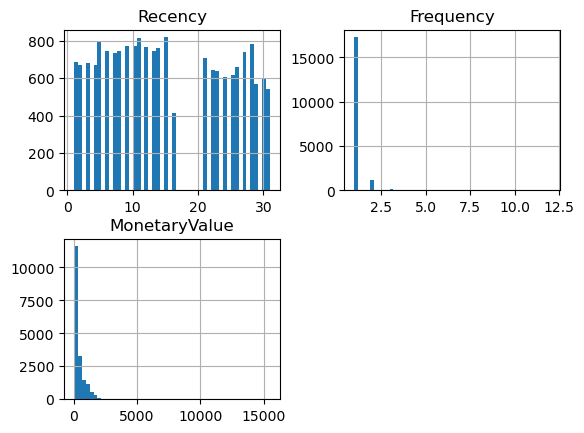

In [45]:
# 한쪽으로 치우친 데이터
# 정규분포로 만들어야 함 -> log 활용

rfm_cluster.hist(bins=50);

In [46]:
# rfm_cluster log 변환

rfm_cluster_log = np.log(rfm_cluster + 1)
rfm_cluster_log.head(2)

,Recency,Frequency,MonetaryValue
user_id,,,
435648894,3.295837,0.693147,5.963913
437371552,3.433987,0.693147,5.193734


In [47]:
# 데이터가 잘 정규화되었는지 확인

rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,18684.000000,18684.000000,18684.000000
mean,2.551565,0.730160,5.501298
std,0.745280,0.140117,1.062550
min,0.693147,0.693147,1.238374
25%,2.079442,0.693147,4.886809
50%,2.639057,0.693147,5.499093
75%,3.218876,0.693147,6.229068
max,3.465736,2.564949,9.649112


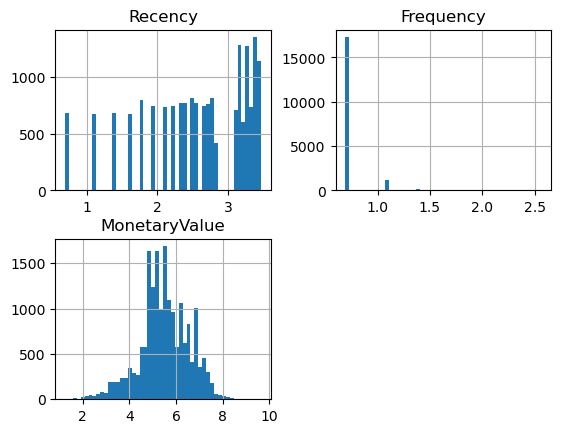

In [48]:
# Frequency는 RFM만들 때 sample data일부터 1이 너무 많았음. 

rfm_cluster_log.hist(bins=50);

## 스케일 조정

In [49]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 스케일러
ss.fit(rfm_cluster_log) # 평균과 표준편차 학습
X = ss.transform(rfm_cluster_log) # 평균을 0, 표준편차를 1로 변환
X

array([[ 0.99867391, -0.26416645,  0.43539275],
       [ 1.18404587, -0.26416645, -0.28946541],
       [ 1.14004805, -0.26416645, -1.60057897],
       ...,
       [-2.49364962, -0.26416645,  0.60689316],
       [-2.49364962, -0.26416645,  1.80187246],
       [-2.49364962, -0.26416645,  1.01645355]])

In [50]:
pd.DataFrame(X).describe().round(2)

,0,1,2
count,18684.00,18684.00,18684.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-2.49,-0.26,-4.01
25%,-0.63,-0.26,-0.58
50%,0.12,-0.26,-0.00
75%,0.90,-0.26,0.68
max,1.23,13.10,3.90


## K-means

In [51]:
# K-means를 활용해 적절한 군집의 개수 파악하기

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_, kmeans.inertia_

inertia = [] # 각 군집별 오차의 제곱의 합
silhouettes = []
range_n_clusters = range(2, 20) # 클러스터의 개수 (2개~19개 중 적절한 클러스터의 개수가 뭘까?)

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=",")

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

## Elbow Method
- 최적의 군집의 개수는 몇개일까?

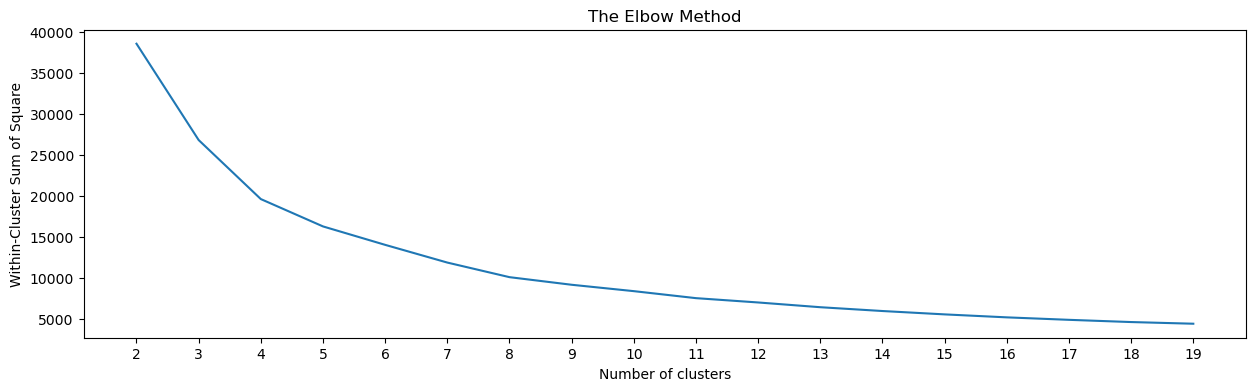

In [52]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia) # k가 증가하면 inertia가 줄어들게 됨
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square') # 각 클러스터 내 관측값의 변동성을 측정하는 척도. 작을수록 더 콤팩트한 클러스터.
plt.xticks(range_n_clusters)
plt.show()

## Silhouette Score
- 각 데이터가 해당 데이터와 같은 군집 내의 데이터와는 얼마나 가깝게 군집화가 되었고, 다른 군집에 있는 데이터와는 얼마나 멀리 분포되어 있는지를 나타내는 지표
- 실루엣 계수 점수가 크다 = 군집 간의 거리가 멀다 = 잘 군집화 되어 있다.

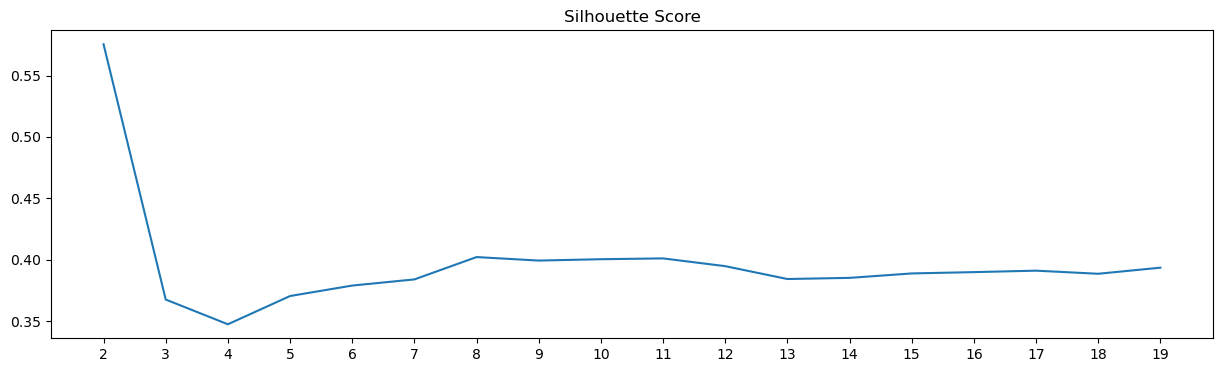

In [53]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

## KElbowVisualizer
- 결론 : 클러스터의 개수는 4개가 적당하다.

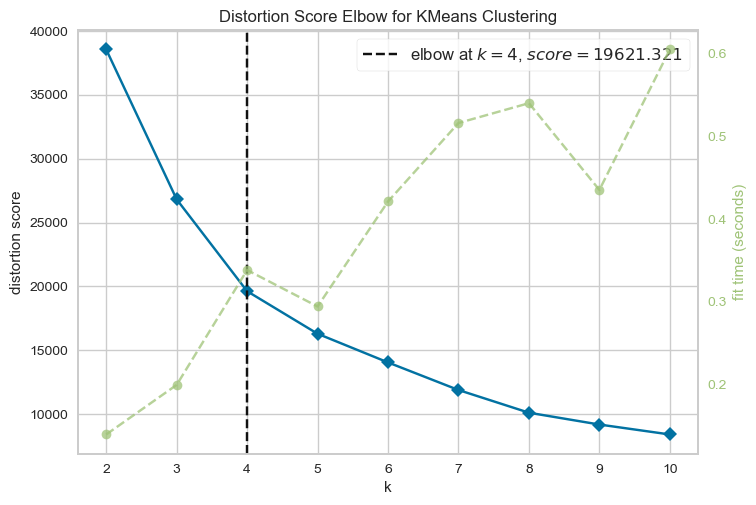

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer

kev = KElbowVisualizer(kmeans, k=10)
kev.fit(X)
kev.show()

## n_clusters = 4로 학습하기

In [55]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [56]:
# 클러스터마다 몇 개가 속해있는지 확인

pd.Series(kmeans.labels_).value_counts()

3    6356
1    6355
0    4571
2    1402
dtype: int64

In [57]:
X.shape

(18684, 3)

In [58]:
# silhouette_score 구하기

silhouette_avg = silhouette_score(X, kmeans.labels_)

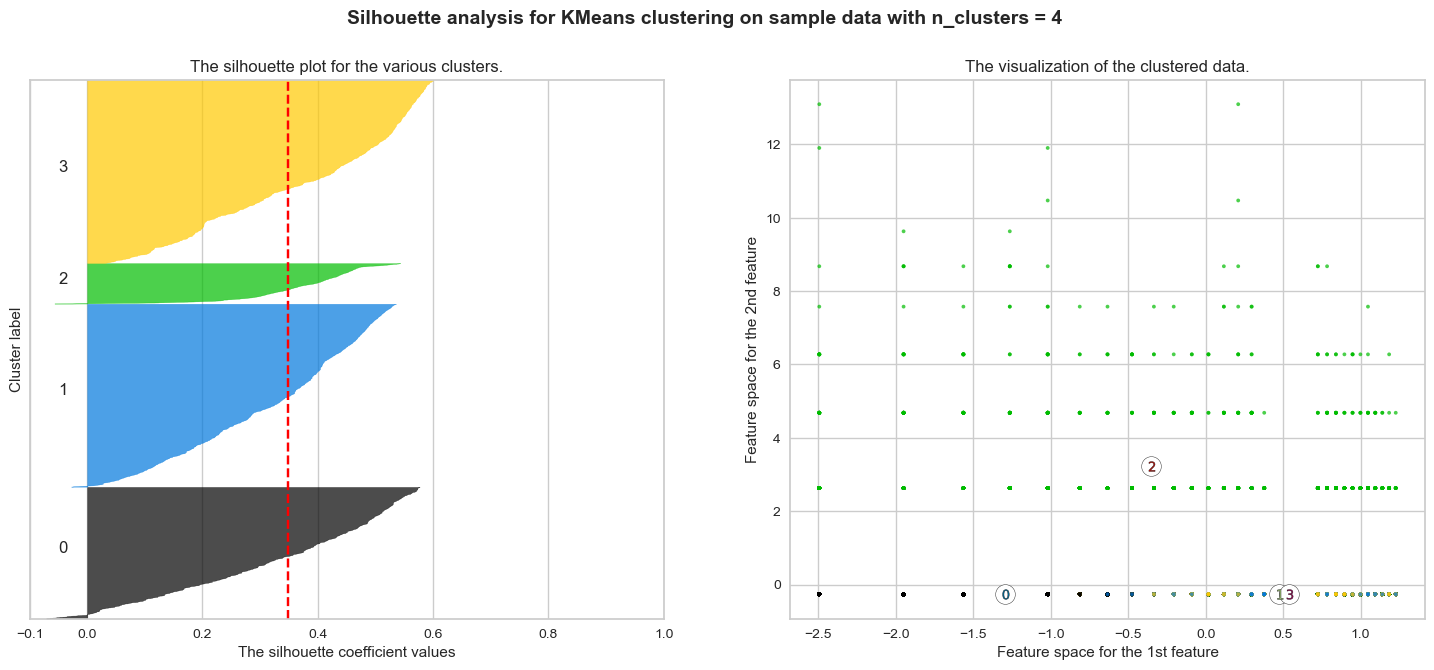

In [59]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [60]:
rfm["Cluster"] = kmeans.labels_
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
user_id,,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver,3
437371552,30,1,179.139999,1,1,2,112,4,silver,1


In [61]:
pd.crosstab(rfm["RFM_class"], rfm["Cluster"])

Cluster,0,1,2,3
RFM_class,,,,
silver,649,5233,25,2459
gold,1363,958,108,2441
platinum,2559,164,1269,1456


<AxesSubplot: xlabel='Cluster', ylabel='RFM_score'>

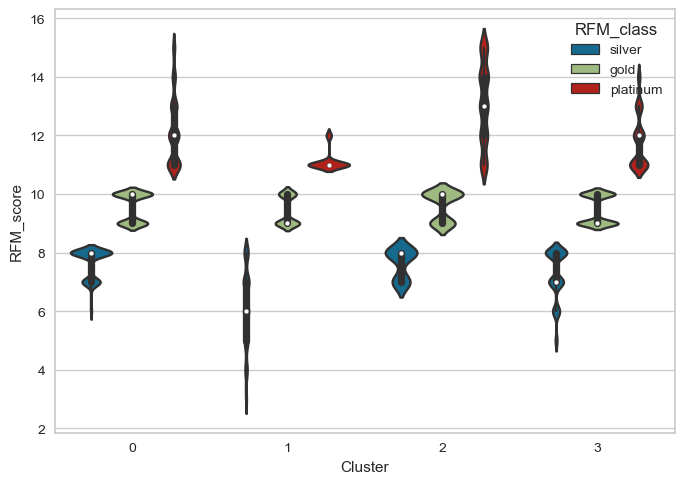

In [62]:
# RFM과 Clusters 시각화

sns.violinplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class")

# 분석주제(1) 집단별 view, cart, purchase 비율 확인

## 사용할 데이터프레임 가져오기

In [64]:
display(rfm.shape)
display(rfm.head(2))

(18684, 10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
user_id,,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver,3
437371552,30,1,179.139999,1,1,2,112,4,silver,1


In [65]:
display(sample.shape)
display(sample.head(2))

(1000000, 8)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
6733995,2019-10-06 08:34:28+00:00,view,16700605,2053013559901684381,furniture.kitchen.chair,zeta,16.190001,518195082
4880941,2019-10-10 08:31:52+00:00,view,4800725,2053013554658804075,electronics.audio.headphone,sony,8.210000,512421337


In [66]:
# user_id를 인덱스로 지정

sample = sample.set_index("user_id")
sample.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
518195082,2019-10-06 08:34:28+00:00,view,16700605,2053013559901684381,furniture.kitchen.chair,zeta,16.190001
512421337,2019-10-10 08:31:52+00:00,view,4800725,2053013554658804075,electronics.audio.headphone,sony,8.210000


## rfm df에서 cluster 별 user_id 추출

In [80]:
# cluster 0으로 분류된 user_id 추출

cluser_0_user_id = rfm[rfm["Cluster"] == 0].index.tolist()
len(cluser_0_user_id)

4571

In [95]:
# cluster n으로 분류된 user_id를 추출하는 함수

def cluster_user_id(n):
    cluster_user_id = rfm[rfm["Cluster"] == n].index.tolist()
    return cluster_user_id

In [97]:
# 반복문으로 cluster 0 ~ n까지 각 cluster에 속하는 user_id를 추출하기

user_id_list = []

for i in range(0, n_clusters):
    result = cluster_user_id(i)
    user_id_list.append(result)

In [102]:
len(user_id_list[0])

4571

In [103]:
# cluster별 user_id가 담긴 리스트 만들기

cluser_0_user_id = user_id_list[0]
cluser_1_user_id = user_id_list[1]
cluser_2_user_id = user_id_list[2]
cluser_3_user_id = user_id_list[3]
display(len(cluser_0_user_id))
display(len(cluser_1_user_id))
display(len(cluser_2_user_id))
display(len(cluser_3_user_id))

4571

6355

1402

6356

In [115]:
# sample df에서 cluster 0인 고객의 정보 가져오기
# 즉, sample df의 index가 cluser_0_user_id인 값만 가져오기

sample_cluster_0 = sample.loc[cluser_0_user_id]
sample_cluster_0.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
456810531,2019-10-29 07:55:42+00:00,view,14100255,2053013557670314521,electronics.audio.acoustic,aria,133.350006
456810531,2019-10-25 16:08:39+00:00,purchase,14100255,2053013557670314521,electronics.audio.acoustic,aria,133.350006


In [116]:
# sample df에서 cluster 1인 고객의 정보 가져오기

sample_cluster_1 = sample.loc[cluser_1_user_id]
sample_cluster_1.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
437371552,2019-10-02 04:38:49+00:00,view,1004838,2053013555631882655,electronics.smartphone,oppo,179.139999
437371552,2019-10-02 05:00:12+00:00,purchase,1004838,2053013555631882655,electronics.smartphone,oppo,179.139999


In [117]:
# sample df에서 cluster 2인 고객의 정보 가져오기

sample_cluster_2 = sample.loc[cluser_2_user_id]
sample_cluster_2.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
497226076,2019-10-19 13:32:18+00:00,view,1002524,2053013555631882655,electronics.smartphone,apple,534.039978
497226076,2019-10-20 08:55:01+00:00,purchase,1004237,2053013555631882655,electronics.smartphone,apple,1093.930054


In [118]:
# sample df에서 cluster 3인 고객의 정보 가져오기

sample_cluster_3 = sample.loc[cluser_3_user_id]
sample_cluster_3.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
435648894,2019-10-06 08:47:28+00:00,purchase,1004875,2053013555631882655,electronics.smartphone,samsung,388.130005
477652311,2019-10-07 16:35:16+00:00,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,250.970001


In [119]:
# shape 확인

display(sample_cluster_0.shape)
display(sample_cluster_1.shape)
display(sample_cluster_2.shape)
display(sample_cluster_3.shape)

(11731, 7)

(16309, 7)

(9293, 7)

(15868, 7)

## Cluster별 고객의 view, cart, purchase 비율
- 함수로 간단히 만들면 좋겠음

In [142]:
# cluster가 0인 고객의 view, cart, purchase 비율

vcp_0 = sample_cluster_0["event_type"].value_counts(normalize=True)
vcp_0 = vcp_0.to_frame()
vcp_0 = vcp_0.rename(columns={"event_type":"vcp_0"})
vcp_0

,vcp_0
view,0.549910
purchase,0.389651
cart,0.060438


In [143]:
# cluster가 1인 고객의 view, cart, purchase 비율

vcp_1 = sample_cluster_1["event_type"].value_counts(normalize=True)
vcp_1 = vcp_1.to_frame()
vcp_1 = vcp_1.rename(columns={"event_type":"vcp_1"})
vcp_1

,vcp_1
view,0.557851
purchase,0.390091
cart,0.052057


In [144]:
# cluster가 2인 고객의 view, cart, purchase 비율

vcp_2 = sample_cluster_2["event_type"].value_counts(normalize=True)
vcp_2 = vcp_2.to_frame()
vcp_2 = vcp_2.rename(columns={"event_type":"vcp_2"})
vcp_2

,vcp_2
view,0.550307
purchase,0.353707
cart,0.095986


In [145]:
# cluster가 3인 고객의 view, cart, purchase 비율

vcp_3 = sample_cluster_3["event_type"].value_counts(normalize=True)
vcp_3 = vcp_3.to_frame()
vcp_3 = vcp_3.rename(columns={"event_type":"vcp_3"})
vcp_3

,vcp_3
view,0.531195
purchase,0.400555
cart,0.068251


In [152]:
# 시각화를 위한 df 만들기

df_vcp = pd.concat([vcp_0, vcp_1, vcp_2, vcp_3], axis=1)
df_vcp = df_vcp.reset_index().rename(columns={"index":"event_type"})
df_vcp = df_vcp.melt(id_vars="event_type",
                     value_vars=["vcp_0", "vcp_1", "vcp_2", "vcp_3"]
                    ).rename(columns={"variable":"cluster", "value":"prop"})
df_vcp

,event_type,cluster,prop
0,view,vcp_0,0.549910
1,purchase,vcp_0,0.389651
2,cart,vcp_0,0.060438
3,view,vcp_1,0.557851
4,purchase,vcp_1,0.390091
5,cart,vcp_1,0.052057
6,view,vcp_2,0.550307
7,purchase,vcp_2,0.353707
8,cart,vcp_2,0.095986
9,view,vcp_3,0.531195


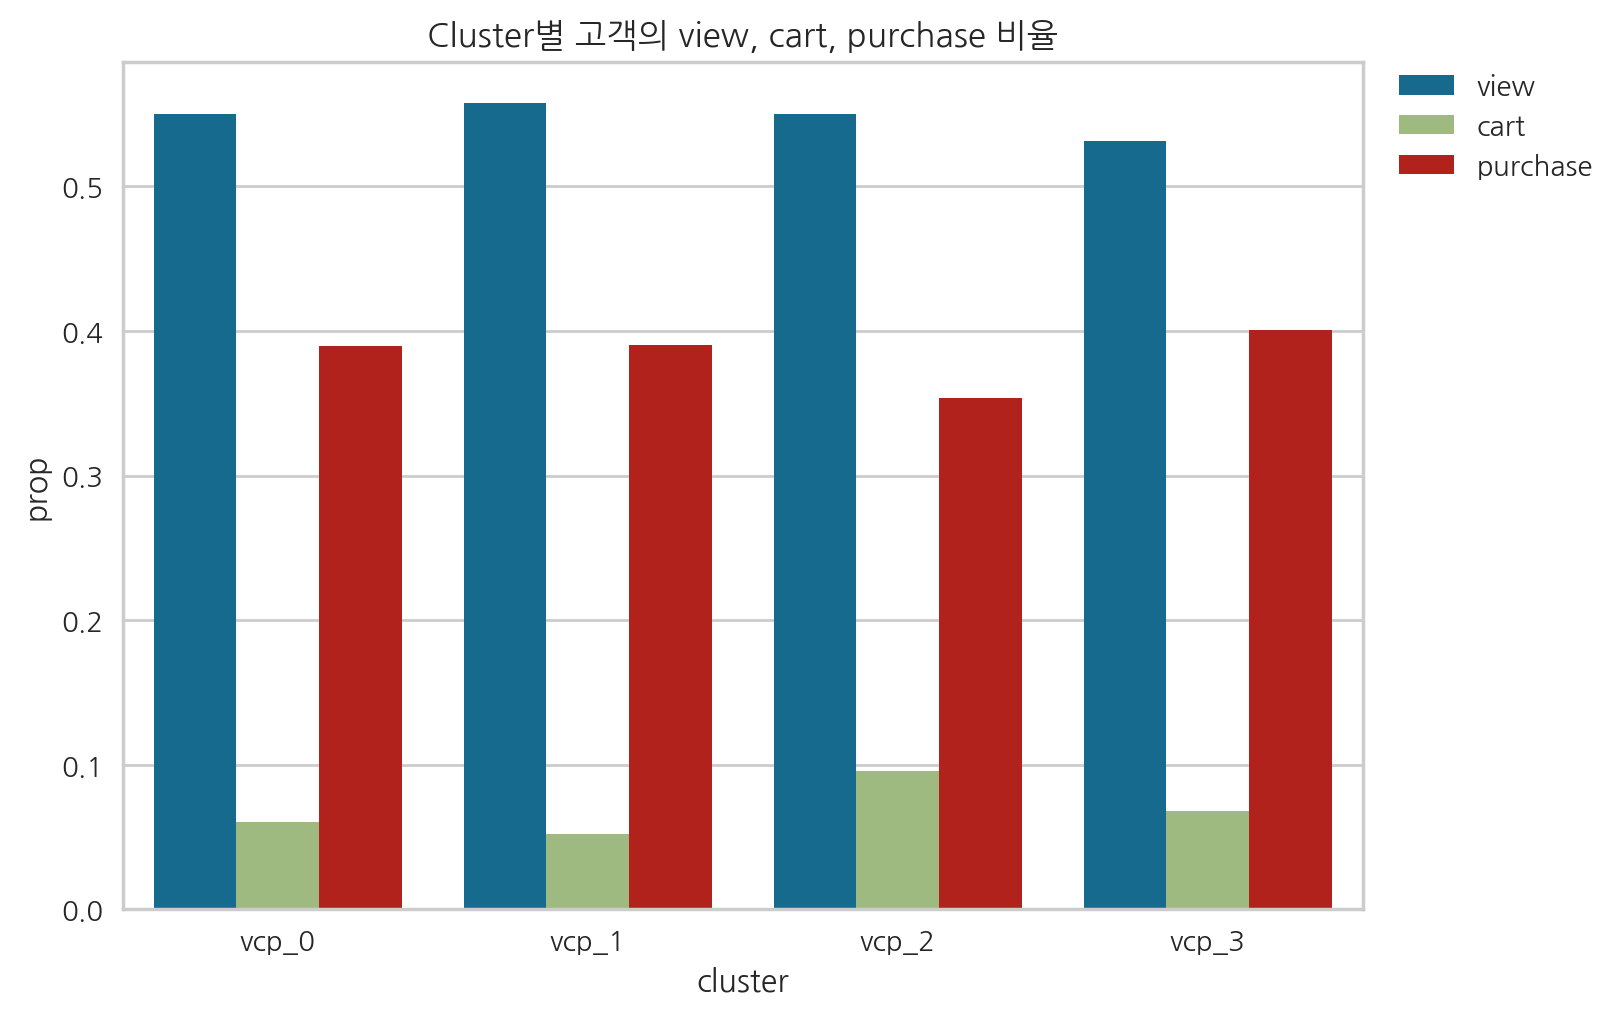

In [170]:
# 시각화 : Cluster별 고객의 view, cart, purchase 비율

fig = sns.barplot(data=df_vcp, x="cluster", y="prop", hue="event_type",
                 hue_order=["view", "cart", "purchase"]
                 ).set(title='Cluster별 고객의 view, cart, purchase 비율')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [184]:
# stacked bar를 위한 df

df_vcp2 = pd.concat([vcp_0, vcp_1, vcp_2, vcp_3], axis=1).T
df_vcp2

,view,purchase,cart
vcp_0,0.549910,0.389651,0.060438
vcp_1,0.557851,0.390091,0.052057
vcp_2,0.550307,0.353707,0.095986
vcp_3,0.531195,0.400555,0.068251


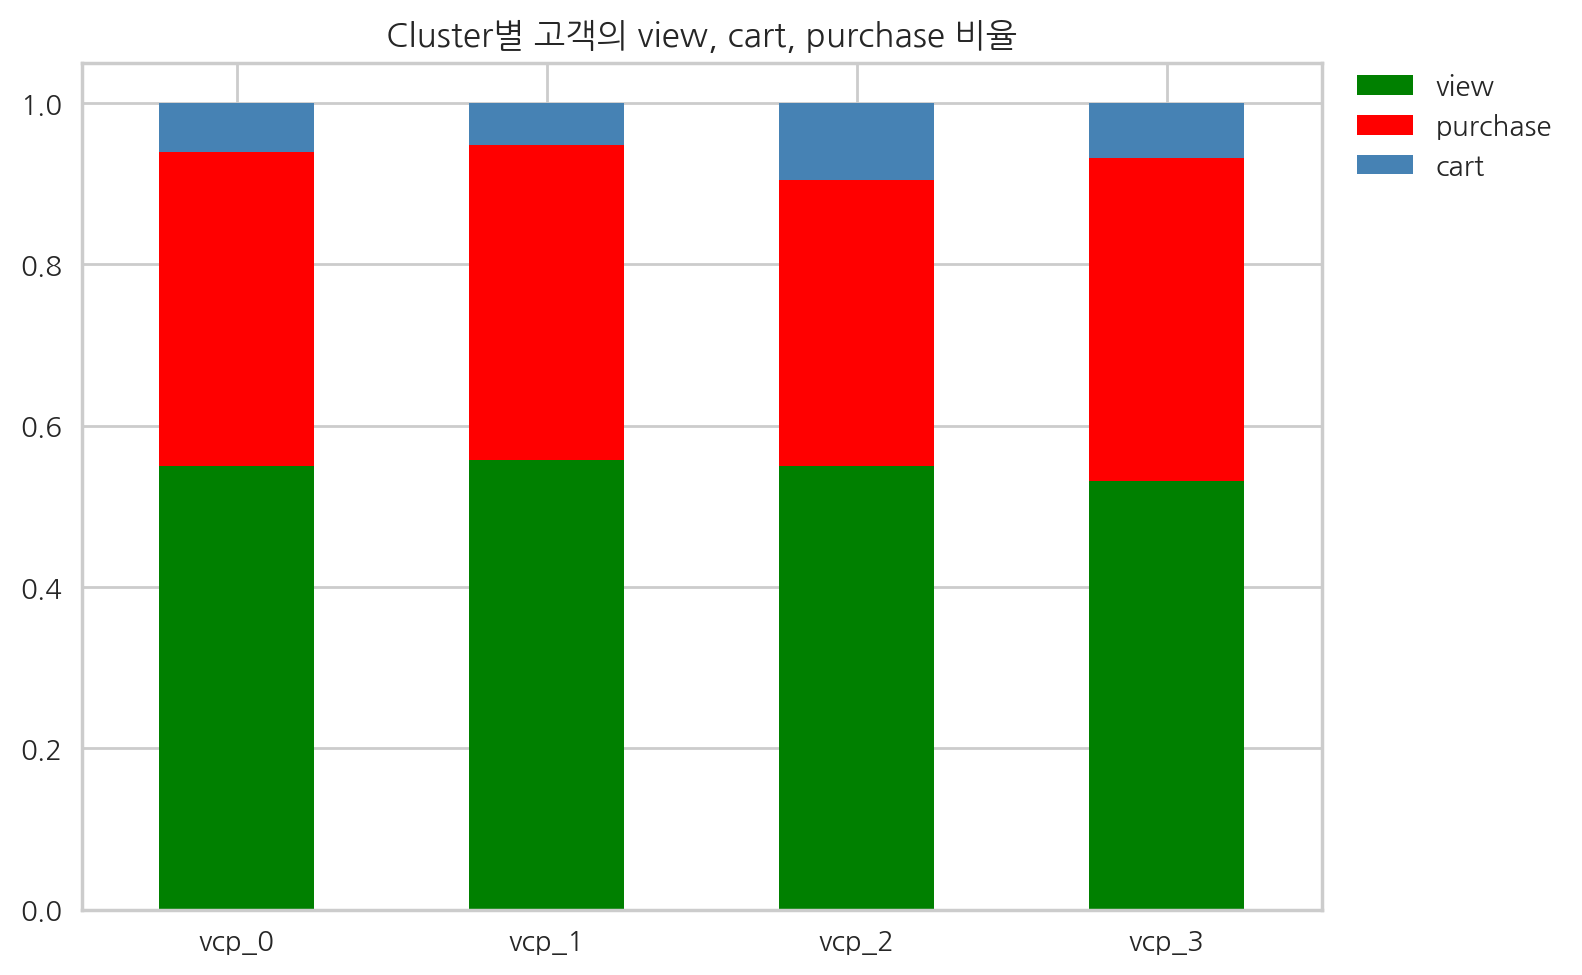

In [190]:
# stacked bar 시각화

df_vcp2.plot(kind='bar',
             stacked=True,
             color=['green', 'red', 'steelblue'],
             rot=0
             ).set(title='Cluster별 고객의 view, cart, purchase 비율')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

* 크게 눈에 띄는 수치는 없었으나, cluster 2의 경우 cart에 담는 비율이 다른 cluster보다 높음

In [173]:
# 그나저나 cart 비율이 purchase 보다 많음... why?

# 원래 sample data에서는 purchase < cart < view 순
display(sample["event_type"].value_counts())

# 하지만 클러스터별로 추출한 데이터에서는 cart < purchase < view 순
display(sample_cluster_0["event_type"].value_counts())

view        950218
cart         29206
purchase     20576
Name: event_type, dtype: int64

view        6451
purchase    4571
cart         709
Name: event_type, dtype: int64

<나의 해석>

* 클러스터로 구분한 사람들은 모두 최종 구매를 한 사람들
* 이 사람들은 view를 하고 장바구니를 거치지 않고 바로 구매를 많이 했다?

#  분석주제(2) 집단별 view -> cart, cart -> purchase 비율 비교

## view에서 cart로 넘어간 비율이 높은 집단은?

##  cart에서 purchase로 넘어간 비율이 높은 집단은?